# depmap problem
1- Huge amount of data, i do not want what to extract
2- can we have API

# what i found 
1- https://depmap.org/portal/api/

2 - https://smart-api.info/ui/7439c6cae79dc74f0631863408088e81 2017
R package 
They describe the package like this " The depmap package aims to provide a reproducible research framework to cancer dependency data described by Tsherniak, Aviad, et al. “Defining a cancer dependency map.” Cell 170.3 (2017): 564-576.. The data found in the depmap package has been formatted to facilitate the use of common R packages such as dplyr and ggplot2. We hope that this package will allow researchers to more easily mine, explore and visually illustrate dependency data taken from the Depmap cancer genomic dependency study."

3- https://pypi.org/project/depmap-downloader/   from 2021
python package 
THey said "The DepMap has a secret API that this package wraps, so you can always get the latest version of some select datasets using pystow."


# How lettrature try to handel depmap
1- https://www.nature.com/articles/s41467-024-52900-7?fbclid=IwY2xjawGViRZleHRuA2FlbQIxMAABHRJxNIxQJcbNljSOLiTk0f0wvRD3yHc-9-f9VuxTKPj169_05fECZv3ceA_aem_eCKPvboW-wEFt1xjLCHCDg#data-availability
Intressting aritcl bechmarked diffrent classafier to se which perform better as i understood 

# Labeling data using NSMexp
get inspiration of negative sampling labeling from this artickel 
https://www.nature.com/articles/s41467-024-52900-7?fbclid=IwY2xjawGViRZleHRuA2FlbQIxMAABHRJxNIxQJcbNljSOLiTk0f0wvRD3yHc-9-f9VuxTKPj169_05fECZv3ceA_aem_eCKPvboW-wEFt1xjLCHCDg#data-availability
​Using gene expression correlation, assuming SL pairs show positive correlations.

# Download geneexprestion  

1-these valuse are inferred from RNA-seq data using RSEM (stranded or unstranded mode, depending on each sample's sequencing protocol

2-log2 transformation, using a pseudo-count of 1; log2(TPM+1).

3- Batch-corrected for strandedness using ComBat https://academic.oup.com/nargab/article/2/3/lqaa078/5909519.

# The data structure
Rows (ACH IDs) represent individual cell lines in the DepMap dataset.

Columns (Genes) represent individual genes and their respective dependency or expression values for each cell line.



In [1]:
import pandas as pd

# Open inzolia libraly in pandas dataframe

In [2]:
file_path_enz = "/home/user/Desktop/paralog_pairs.txt"
df_inz = pd.read_csv(file_path_enz, sep='\t')
df_inz

# cleaned the ReagentID suffix 
# copay to avoid modifaying of the orignal data frame 
df_inz_cleaned = df_inz.copy()

# # cleaned the ReagentID suffix 
df_inz_cleaned['ReagentID'] = df_inz_cleaned['ReagentID'].str.rsplit('_', n=1).str[0]
df_inz = df_inz_cleaned
df_inz

# Remove the duplicate columns from ReagentID
df_inz = df_inz.drop_duplicates(subset='ReagentID', keep='first')

df_inz


,ReagentID,Gene1,Gene2,Gene1_ensembl,Gene2_ensembl
0,ACTB_ACTG1,ACTB,ACTG1,ENSG00000075624,ENSG00000184009
2,EOLA1_EOLA2,EOLA1,EOLA2,ENSG00000197620,ENSG00000197021
4,RABL2A_RABL2B,RABL2A,RABL2B,ENSG00000079974,ENSG00000144134
6,RPL26_RPL26L1,RPL26,RPL26L1,ENSG00000161970,ENSG00000037241
8,CDK11A_CDK11B,CDK11A,CDK11B,ENSG00000008128,ENSG00000248333
...,...,...,...,...,...
8768,ZNF26_ZNF789,ZNF26,ZNF789,ENSG00000198393,ENSG00000198556
8770,ZNF227_ZNF514,ZNF227,ZNF514,ENSG00000131115,ENSG00000144026
8772,ZBTB12_ZBTB26,ZBTB12,ZBTB26,ENSG00000204366,ENSG00000171448
8774,ZNF41_ZNF517,ZNF41,ZNF517,ENSG00000147124,ENSG00000197363


# open the exprestion of gene in depmap dataframe 

In [3]:
file_path_exp = "/home/user/Desktop/OmicsExpressionProteinCodingGenesTPMLogp1BatchCorrected.csv"
df_exp = pd.read_csv(file_path_exp) #, sep='\t')

df_exp

,Unnamed: 0,ZNF891 (101060200),ARMC10 (83787),PTGER4 (5734),EIF1AD (84285),ABCG5 (64240),CXCR4 (7852),CAPNS1 (826),PTGES3L (100885848),DESI1 (27351),...,FAM13C (220965),MUC20 (200958),MST1R (4486),TELO2 (9894),THSD8 (10535),FCRL6 (343413),DNMT3B (1789),ZCCHC10 (54819),PRSS2 (5645),ADAMTSL4 (54507)
0,ACH-000058,0.984137,4.524944,2.019524,4.420996,0.008593,2.878444,8.826616,1.271285,4.845356,...,3.609960,0.919372,0.822956,4.729497,0.378973,0.118191,2.320999,5.005448,0.169594,1.356288
1,ACH-000082,1.335101,3.974294,1.923885,5.944557,-0.004166,0.015807,8.713795,1.100559,5.127569,...,2.385559,0.747008,-0.024374,4.951305,1.358939,0.010153,2.482620,4.645063,0.229243,0.795239
2,ACH-000867,0.752579,4.698468,4.105001,4.977835,-0.004166,0.067020,8.814895,1.208919,3.958060,...,0.020196,0.961202,4.343578,4.350107,0.496524,0.010153,2.047717,4.499003,0.263870,6.488749
3,ACH-000437,1.589078,5.694567,3.362272,4.755702,-0.004166,2.209505,8.771923,-0.063552,4.887860,...,1.319288,0.097996,0.574288,4.995876,0.000251,-0.003950,2.239845,4.778812,0.263870,1.205591
4,ACH-000544,0.530802,5.763150,0.609288,3.859448,-0.004166,0.104263,7.144498,0.454252,2.902045,...,0.062854,0.337046,2.543587,3.623702,0.270899,-0.003950,1.300537,4.562580,-0.012068,0.707417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,ACH-001743,1.758635,4.018689,0.466995,5.061913,0.028729,6.795735,8.273347,3.467564,4.792013,...,1.483340,0.600200,0.422557,4.858321,1.010049,0.007287,2.807276,5.038799,0.357770,0.830711
1513,ACH-001578,1.468892,4.371248,0.158564,5.138487,0.008207,1.357824,8.165664,2.744573,3.641396,...,0.314121,1.164968,1.764547,4.767582,0.999477,0.007287,7.984103,5.146845,0.100699,1.938515
1514,ACH-002669,0.625717,5.547625,0.660670,5.965505,0.069170,0.378836,8.700101,0.656362,4.073519,...,0.014741,3.980806,5.753675,3.564924,0.685048,0.007287,2.124063,4.695655,2.768168,2.427776
1515,ACH-001858,0.916541,5.203590,1.465734,5.390739,0.008207,0.226431,9.391706,0.624780,4.231533,...,1.731118,3.566693,2.434177,4.264109,0.659196,0.022169,2.396321,4.408144,0.100699,2.087370


# Extract Inzolias genes exprestion values 

In [4]:
# Clean the column headers in df_exp
df_exp.columns = [col.split(" (")[0] if " (" in col else col for col in df_exp.columns]

# Initialize an empty list to hold the data for Gene1 and Gene2 expression
expression_data = []

# Iterate over each row in the reagent_df to extract Gene1 and Gene2 expressions
for _, row in df_inz.iterrows():
    reagent_id = row['ReagentID']
    gene1 = row['Gene1']
    gene2 = row['Gene2']
    
    # Check if Gene1 and Gene2 are present in df_exp columns
    if gene1 in df_exp.columns and gene2 in df_exp.columns:
        # Extract expression data for all cell lines and store it in a temporary DataFrame
        temp_df = df_exp[['Unnamed: 0', gene1, gene2]].copy()
        temp_df.columns = ['Cell_Line', 'Gene1_expression', 'Gene2_expression']
        temp_df['ReagentID'] = reagent_id  # Add ReagentID column
        
        # Append to the list
        expression_data.append(temp_df)
    else:
        # Print informative message if either gene is not found
        missing_genes = []
        if gene1 not in df_exp.columns:
            missing_genes.append(gene1)
        if gene2 not in df_exp.columns:
            missing_genes.append(gene2)
        print(f"Genes not found for ReagentID {reagent_id}: {', '.join(missing_genes)}")

# Check if there are any expression data collected
if expression_data:
    # Concatenate all individual DataFrames in the list to get the final output
    final_expression_df = pd.concat(expression_data, ignore_index=True)

    # Display the final DataFrame
    print(final_expression_df)
else:
    print("No expression data was collected.")

          Cell_Line  Gene1_expression  Gene2_expression      ReagentID
0        ACH-000058         11.192051         11.328729     ACTB_ACTG1
1        ACH-000082         12.739343         11.145570     ACTB_ACTG1
2        ACH-000867         10.571643          9.839114     ACTB_ACTG1
3        ACH-000437         12.340807         11.277859     ACTB_ACTG1
4        ACH-000544         10.513251          9.981975     ACTB_ACTG1
...             ...               ...               ...            ...
6658108  ACH-001743          6.284228          5.015632  PTDSS1_PTDSS2
6658109  ACH-001578          5.491514          4.822039  PTDSS1_PTDSS2
6658110  ACH-002669          6.301047          3.990523  PTDSS1_PTDSS2
6658111  ACH-001858          5.687803          4.560714  PTDSS1_PTDSS2
6658112  ACH-001997          5.777899          3.921905  PTDSS1_PTDSS2

[6658113 rows x 4 columns]


# Exclude empty raws if they are any 

In [15]:
# Step 1: Filter rows in final_expression_df where Gene1_expression or Gene2_expression are 0 or NaN
zero_or_nan_rows = final_expression_df[

    (final_expression_df['Gene1_expression'].isna()) | 
    (final_expression_df['Gene2_expression'].isna())
]

# Display or process the filtered rows with 0 or NaN values
print("Rows with empty (NaN) values for Gene1_expression or Gene2_expression:")
print(zero_or_nan_rows)



Rows with empty (NaN) values for Gene1_expression or Gene2_expression:
Empty DataFrame
Columns: [Cell_Line, Gene1_expression, Gene2_expression, ReagentID]
Index: []


# The distrubtion of the overlap between inzolia and gene exprestion

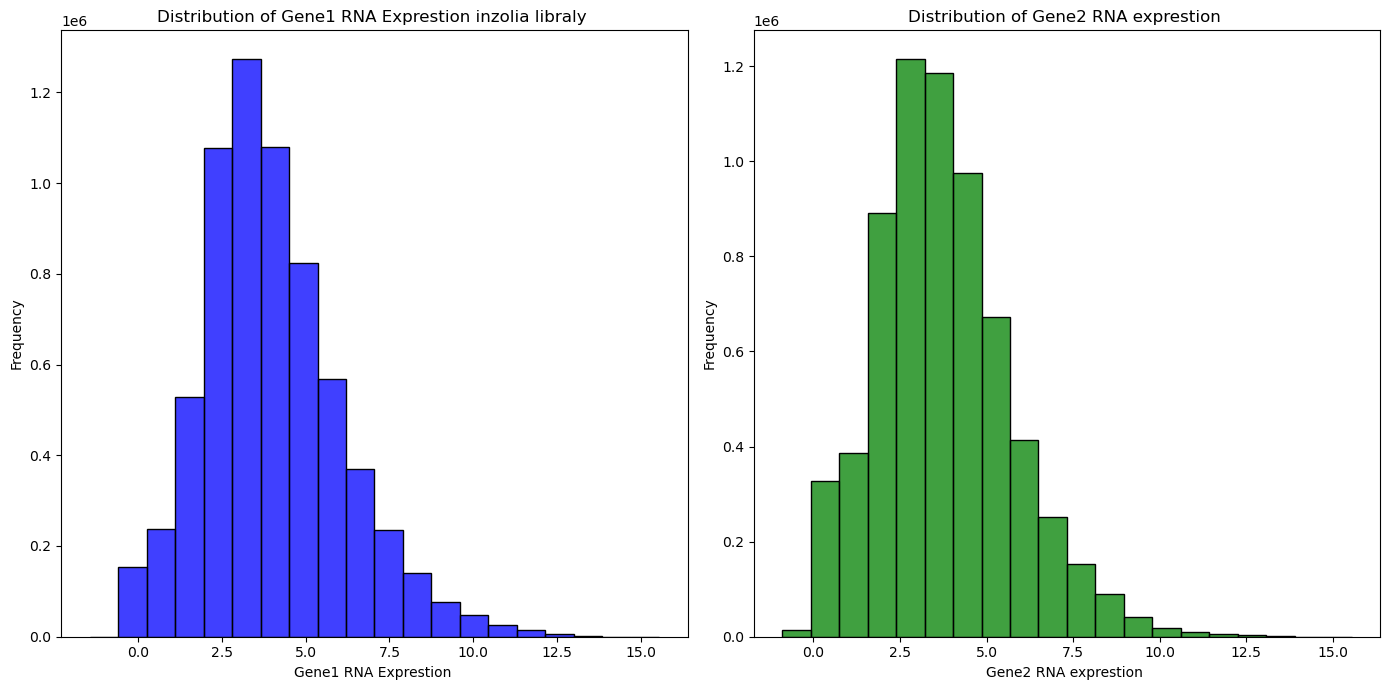

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the final_expression_df has data
if not final_expression_df.empty:
    # Set the size of the plot
    plt.figure(figsize=(14, 7))
    
    # Create histograms for Gene1_expression and Gene2_expression
    plt.subplot(1, 2, 1)
    sns.histplot(final_expression_df['Gene1_expression'], kde=False, color='blue', bins=20)
    plt.title('Distribution of Gene1 RNA Exprestion inzolia libraly ')
    plt.xlabel('Gene1 RNA Exprestion ')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.histplot(final_expression_df['Gene2_expression'], kde=False, color='green', bins=20)
    plt.title('Distribution of Gene2 RNA exprestion ')
    plt.xlabel('Gene2 RNA exprestion ')
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
else:
    print("No expression data available for visualization.")


#  Perform quality control (QC) on the expression data for Gene1 and Gene2 and check if their expression values follow a normal distribution
from scipy.stats. model i plot probplot for gene 1 and gene 2 RNA exprestion to chech how gene1 cell lines exprestion distruputes acoroos cell

 a quantile-quantile (Q-Q) plot. A Q-Q plot compares the distribution of your data with a theoretical normal distribution; if the points roughly align along the line 𝑦=𝑥
y=x, the data is likely normally distributed.

Theoretical Quantiles represent the expected distribution if your data followed a specified theoretical distribution (e.g., normal distribution). These values show how the data should ideally be distributed if it exactly followed this theoretical model.

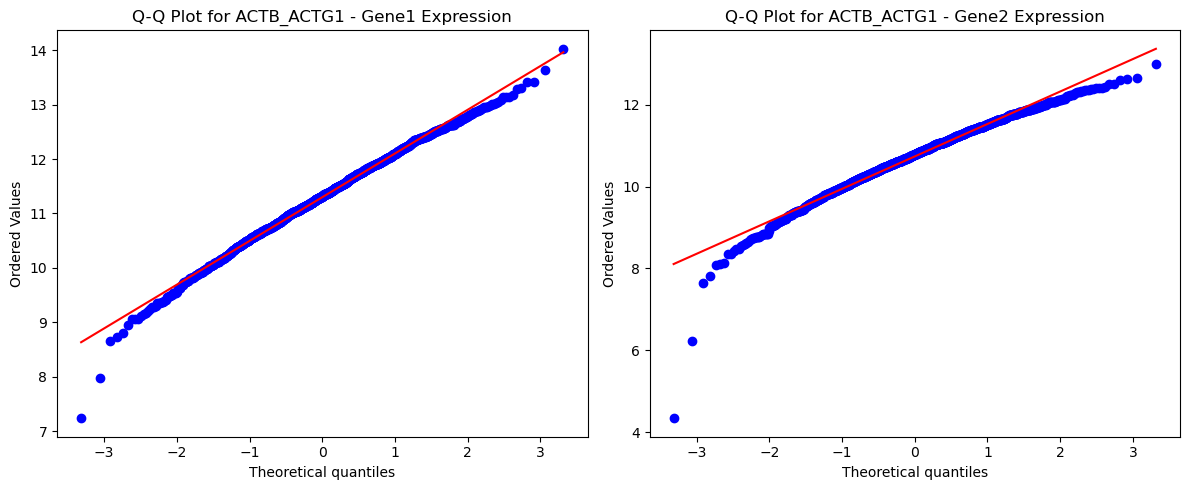

KeyboardInterrupt: 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate Q-Q Plots for Gene1 and Gene2 Expression Values

# Loop through each unique ReagentID to generate separate Q-Q plots for Gene1 and Gene2
for reagent_id in final_expression_df['ReagentID'].unique():
    # Filter the DataFrame for the current ReagentID
    reagent_df = final_expression_df[final_expression_df['ReagentID'] == reagent_id]
    
    # Extract Gene1 and Gene2 expression values
    gene1_expression = reagent_df['Gene1_expression']
    gene2_expression = reagent_df['Gene2_expression']
    
    # Plot Q-Q plot for Gene1 expression
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)  # First plot for Gene1
    stats.probplot(gene1_expression, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {reagent_id} - Gene1 Expression')
    
    # Plot Q-Q plot for Gene2 expression
    plt.subplot(1, 2, 2)  # Second plot for Gene2
    stats.probplot(gene2_expression, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {reagent_id} - Gene2 Expression')
    
    # Show the plot for the current ReagentID
    plt.tight_layout()
    plt.show()


# Caclute the gene 1 and gene 2 correlation 
It used defult perssson correlation (Pearson correlation coefficient)
The assumtion that if the genes coexpress so it may have simillar function
if they are no coexprestion so it may they buffer each other
THese both carterier can asiigned as GI
The thersohold is between -0.6 and 0.6 

# What therothhold should set 
0,9 more extreme theroshold
https://pmc.ncbi.nlm.nih.gov/articles/PMC8016302/?utm_source=perplexity&fbclid=IwY2xjawGYHhBleHRuA2FlbQIxMAABHd2pRIZUL4nHhIUqQtOZMFI2XWN2XJj3wbh8ZMXWfIM6FH1MndfwwNJcTA_aem_bl0lrzgB4CSzFlYIjxFwsg
 0,5 more moderate theoshod

https://medium.com/@anthony.demeusy/pearson-correlation-methodology-limitations-alternatives-part-1-methodology-42abe8f1ba90


In [5]:
# Import necessary libraries
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests
import numpy as np

# Group the DataFrame by 'ReagentID'
grouped_data = final_expression_df.groupby('ReagentID')

# Initialize lists to store results
correlations = []
p_values = []
reagent_ids = []

# Step 2: Calculate the correlation and p-value for each group
for reagent_id, group in grouped_data:
    # Remove any rows with NaN or inf values in `Gene1_expression` or `Gene2_expression`
    group = group.replace([np.inf, -np.inf], np.nan).dropna(subset=['Gene1_expression', 'Gene2_expression'])
    
    # Ensure there are at least two valid data points left for correlation calculation
    if len(group) > 1:
        # Calculate correlation and p-value using Pearson's method
        corr, p_val = pearsonr(group['Gene1_expression'], group['Gene2_expression'])
        
        # Store the results
        correlations.append(corr)
        p_values.append(p_val)
        reagent_ids.append(reagent_id)

# Step 3: Create a DataFrame with ReagentID, Correlation, and p-value
correlation_results = pd.DataFrame({
    'ReagentID': reagent_ids,
    'Correlation_corr': correlations,
    'p_value': p_values
})

# Step 4: Apply False Discovery Rate (FDR) Correction to p-values
# Define the FDR level (10% in this case)
fdr_level = 0.1

# Apply FDR correction
_, pFDR_values, _, _ = multipletests(correlation_results['p_value'], alpha=fdr_level, method='fdr_bh')

# Add the FDR-corrected p-values to the DataFrame with updated column name 'pFDR'
correlation_results['pFDR'] = pFDR_values

# Step 5: Apply Threshold and Determine "GI" or "No GI" Class
# Define the ncorrelation threshold (between -0.6 and 0.6 means "No GI")

# Define the correlation threshold (between -0.6 and 0.6 means "No GI")
correlation_threshold_low = -0.6
correlation_threshold_high = 0.6

# Initialize the Class_label_corr column with 'No GI' by default
correlation_results['Class_label_corr'] = 'no GI'  # Default to "No GI"

# Apply the condition to classify as "GI" based on correlation threshold and FDR p-value
correlation_results.loc[
    (correlation_results['pFDR'] < fdr_level) & 
    ((correlation_results['Correlation_corr'] > correlation_threshold_high) | 
     (correlation_results['Correlation_corr'] < correlation_threshold_low)),
    'Class_label_corr'
] = 'GI'  # Classify as "GI" if the correlation is outside the threshold and pFDR is below the level

# Display the updated DataFrame with the class labels
print(correlation_results)

            ReagentID  Correlation_corr       p_value          pFDR  \
0          AAK1_BMP2K          0.159615  4.057377e-10  5.532100e-10   
1         AARS1_AARS2          0.132821  2.081149e-07  2.643752e-07   
2         ABCA2_ABCA3          0.326935  4.042310e-39  1.087114e-38   
3         ABCA2_ABCA7          0.086174  7.798271e-04  8.999898e-04   
4         ABCA3_ABCA7          0.063370  1.356334e-02  1.499106e-02   
...               ...               ...           ...           ...   
4384  ZSCAN30_ZSCAN31          0.025340  3.239824e-01  3.374369e-01   
4385   ZSCAN30_ZSCAN9          0.280711  7.222388e-29  1.497358e-28   
4386   ZSCAN31_ZSCAN9          0.196111  1.289064e-14  1.947574e-14   
4387    ZSWIM4_ZSWIM6          0.281455  5.108107e-29  1.062535e-28   
4388        ZXDB_ZXDC          0.322427  4.888487e-38  1.284765e-37   

     Class_label_corr  
0               no GI  
1               no GI  
2               no GI  
3               no GI  
4               no GI  
...

# Visualise the distruption of the Corelations

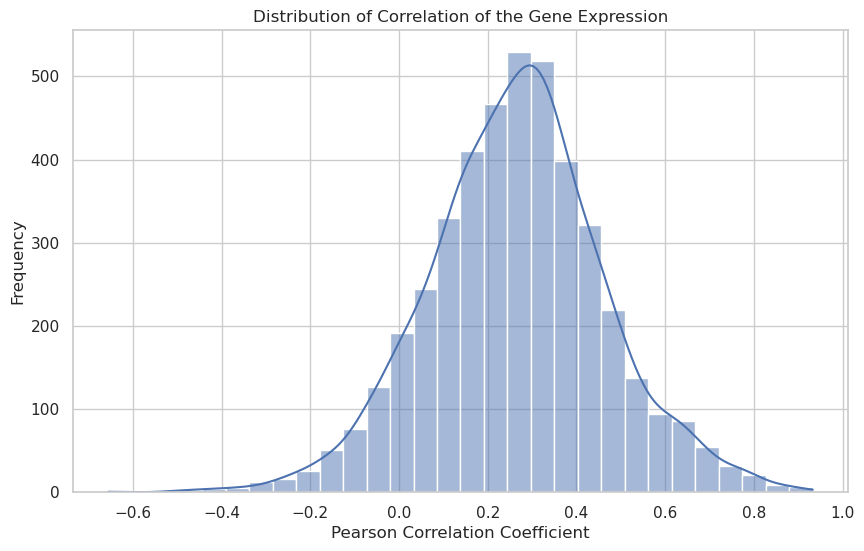

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame
correlation_results = pd.DataFrame(correlation_results)

# Set up the visual style
sns.set(style='whitegrid')

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(correlation_results['Correlation_corr'], bins=30, kde=True)
plt.title('Distribution of Correlation of the Gene Expression')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Open the summodel label file and prepare for comparstion 
 I used the file with loss of linnjarity 
 Did not have purt sequance but the purt sequance is not godd in the quality, missing vaue, many number close to 0
 The file with purt contain genes many genes with GI without knowing why it is GI, loss of linjarity did included also 

In [7]:
file_path_sum = "/home/user/Desktop/2024_08_29/2024_08_27_gis_no_gis_no_gap_plus_lol.txt"
df_sum = pd.read_csv(file_path_sum, sep='\t')

# Rename the column 'class_label ' to 'class_label_sum' to easy comparstion
df_sum = df_sum.rename(columns={'Class_label': 'Class_label_sum'})

# Display the DataFrame
df_sum

,Unnamed: 0,cell_line,condition,Gene_combination,combinatorial_avg_lfc,single_gene1_avg_lfc,single_gene2_avg_lfc,expression_gene1_batch_correct,expression_gene2_batch_correct,Class_label_sum
0,0,A375,2CP,AAK1_BMP2K,-1.323147,-0.986385,-0.524813,2.678502,1.908314,no GI
1,1,A375,2CP,AARS1_AARS2,-4.733963,-4.557785,-2.982134,7.264065,3.454373,lol
2,2,A375,2CP,ABCA2_ABCA3,0.234114,-0.005448,-0.717969,4.184355,0.094743,no GI
3,3,A375,2CP,ABCA2_ABCA7,-0.228554,-0.005448,0.141434,4.184355,1.704554,no GI
4,4,A375,2CP,ABCA3_ABCA7,-0.540774,-0.717969,0.141434,0.094743,1.704554,no GI
...,...,...,...,...,...,...,...,...,...,...
8714,8714,Meljuso,2CP sel,ZSCAN30_ZSCAN31,0.661490,0.242981,0.182299,2.621646,0.640470,no GI
8715,8715,Meljuso,2CP sel,ZSCAN30_ZSCAN9,0.273976,0.242981,0.642505,2.621646,2.892239,no GI
8716,8716,Meljuso,2CP sel,ZSCAN31_ZSCAN9,0.432295,0.182299,0.642505,0.640470,2.892239,no GI
8717,8717,Meljuso,2CP sel,ZSWIM4_ZSWIM6,-0.324097,0.165044,-0.601162,1.086040,2.185050,no GI


# Prepare  correlation model for comparsition


In [8]:
# Rename the column 'ReagentID' to 'Gene_combination' to easy comparstion
correlation_results = correlation_results.rename(columns={'ReagentID': 'Gene_combination'})



# Extract the label from df_sum for comparstion
df_sum_label = df_sum[['Gene_combination','cell_line','condition','Class_label_sum']]
df_sum_label

,Gene_combination,cell_line,condition,Class_label_sum
0,AAK1_BMP2K,A375,2CP,no GI
1,AARS1_AARS2,A375,2CP,lol
2,ABCA2_ABCA3,A375,2CP,no GI
3,ABCA2_ABCA7,A375,2CP,no GI
4,ABCA3_ABCA7,A375,2CP,no GI
...,...,...,...,...
8714,ZSCAN30_ZSCAN31,Meljuso,2CP sel,no GI
8715,ZSCAN30_ZSCAN9,Meljuso,2CP sel,no GI
8716,ZSCAN31_ZSCAN9,Meljuso,2CP sel,no GI
8717,ZSWIM4_ZSWIM6,Meljuso,2CP sel,no GI


# Add both label in the same dataframe

In [9]:
# Coummun data frame from both label 
df_sum_corr_values = pd.merge(df_sum_label, correlation_results[['Gene_combination', 'Correlation_corr','Class_label_corr']], 
                        on='Gene_combination', how='left')

df_sum_corr_values

,Gene_combination,cell_line,condition,Class_label_sum,Correlation_corr,Class_label_corr
0,AAK1_BMP2K,A375,2CP,no GI,0.159615,no GI
1,AARS1_AARS2,A375,2CP,lol,0.132821,no GI
2,ABCA2_ABCA3,A375,2CP,no GI,0.326935,no GI
3,ABCA2_ABCA7,A375,2CP,no GI,0.086174,no GI
4,ABCA3_ABCA7,A375,2CP,no GI,0.063370,no GI
...,...,...,...,...,...,...
8714,ZSCAN30_ZSCAN31,Meljuso,2CP sel,no GI,0.025340,no GI
8715,ZSCAN30_ZSCAN9,Meljuso,2CP sel,no GI,0.280711,no GI
8716,ZSCAN31_ZSCAN9,Meljuso,2CP sel,no GI,0.196111,no GI
8717,ZSWIM4_ZSWIM6,Meljuso,2CP sel,no GI,0.281455,no GI


# Write the correlation method label to the file 

In [39]:
# Save df_sum_corr_values to a text file
df_sum_corr_values.to_csv('gene correlation label.txt', sep='\t', index=False)

# Visualise the corr corrlationn based on sum model label

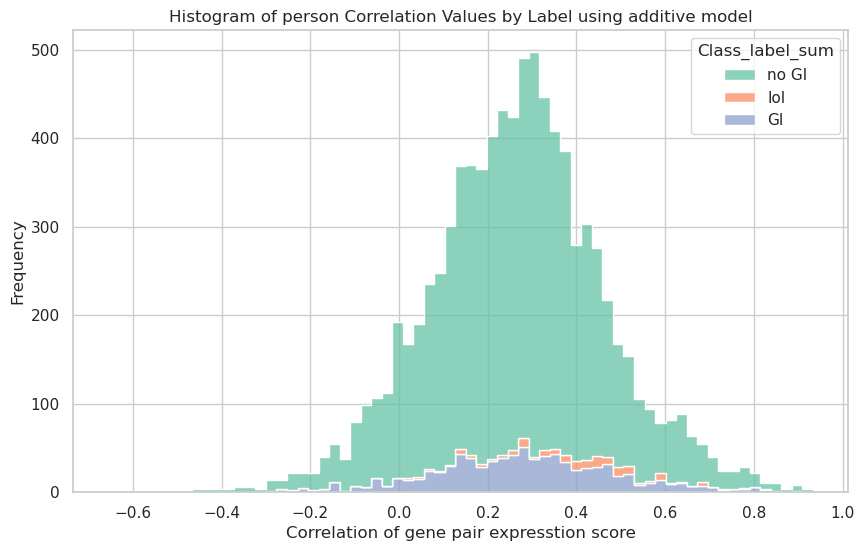

In [10]:
# Plot histograms for each Class_label_sum category
plt.figure(figsize=(10, 6))
sns.histplot(df_sum_corr_values ,x='Correlation_corr', hue='Class_label_sum', element='step', palette='Set2', multiple='stack')

# Add title and labels
plt.title('Histogram of person Correlation Values by Label using additive model')
plt.xlabel('Correlation of gene pair expresstion score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


# Venndiagram compartion between correlation method and sum method 


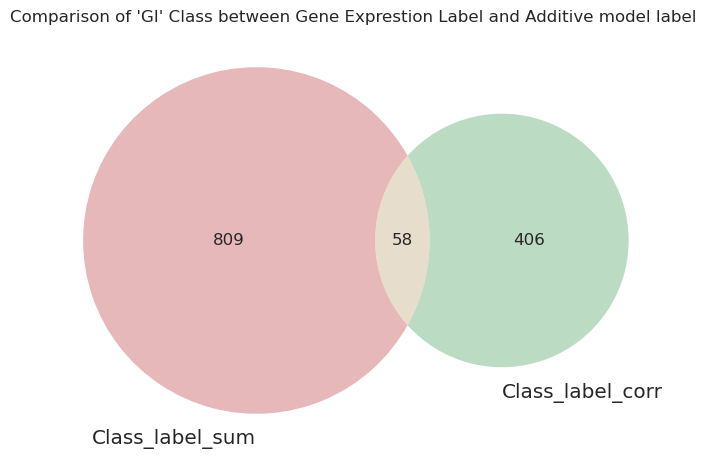

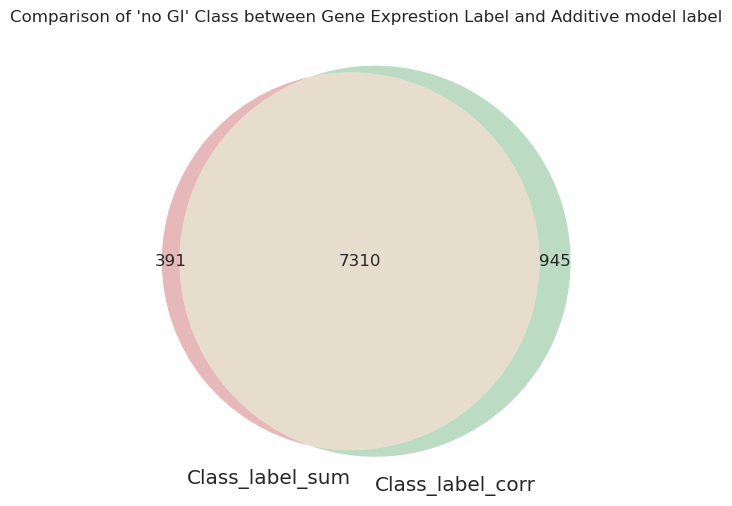

In [12]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Extract "GI" labels from both columns
set_sum = set(df_sum_corr_values[df_sum_corr_values['Class_label_sum'] == 'GI'].index)
set_corr = set(df_sum_corr_values[df_sum_corr_values['Class_label_corr'] == 'GI'].index)

# Plot the Venn diagram comparing "GI" between Class_label_sum and Class_label_corr
plt.figure(figsize=(8, 6))
venn2([set_sum, set_corr], set_labels=('Class_label_sum', 'Class_label_corr'))

# Add a title
plt.title("Comparison of 'GI' Class between Gene Exprestion Label and Additive model label ")

# Show the plot
plt.show()


# Extract "NO GI" labels from both columns
set_sum = set(df_sum_corr_values[df_sum_corr_values['Class_label_sum'] == 'no GI'].index)
set_corr = set(df_sum_corr_values[df_sum_corr_values['Class_label_corr'] == 'no GI'].index)

# Plot the Venn diagram comparing "no GI" between Class_label_sum and Class_label_corr
plt.figure(figsize=(8, 6))
venn2([set_sum, set_corr], set_labels=('Class_label_sum', 'Class_label_corr'))

# Add a title
plt.title("Comparison of 'no GI' Class between Gene Exprestion Label and Additive model label")

# Show the plot
plt.show()


# Extract unique GI in correlation and sum model 

In [24]:
# Extract "GI" labels from both columns
set_sum_gi = set(df_sum_corr_values[df_sum_corr_values['Class_label_sum'] == 'GI'].index)
set_corr_gi = set(df_sum_corr_values[df_sum_corr_values['Class_label_corr'] == 'GI'].index)


# Extract unique Gene combinations for "GI" based on the Venn diagram:
unique_to_sum_gi = set_sum_gi - set_corr_gi
unique_to_corr_gi = set_corr_gi - set_sum_gi
common_gi = set_sum_gi & set_corr_gi

# Convert sets to lists before indexing the DataFrame
df_unique_to_sum_gi = df_sum_corr_values.loc[list(unique_to_sum_gi)]
df_unique_to_corr_gi = df_sum_corr_values.loc[list(unique_to_corr_gi)]
df_common_gi = df_sum_corr_values.loc[list(common_gi)]

# Display DataFrames for "GI":
df_common_gi



,Gene_combination,cell_line,condition,Class_label_sum,Correlation_corr,Class_label_corr
5250,EXT1_EXT2,Meljuso,2CP sel,GI,0.625110,GI
1156,HLA-C_HLA-E,A375,2CP,GI,0.701240,GI
5907,MCM2_MCM5,Meljuso,2CP sel,GI,0.772911,GI
2452,SP100_SP140L,A375,2CP,GI,0.762497,GI
8342,ZNF419_ZNF773,Meljuso,2CP sel,GI,0.805059,GI
2713,TUBB2A_TUBB3,A375,2CP,GI,0.641567,GI
1314,KDELR1_KDELR2,A375,2CP,GI,0.639084,GI
7203,ZBTB26_ZBTB6,Meljuso,2CP sel,GI,0.686729,GI
6564,RPLP1_RPLP2,Meljuso,2CP sel,GI,0.625691,GI
5541,HNRNPA2B1_HNRNPA3,Meljuso,2CP sel,GI,0.669914,GI


# Unique genes that are unique in the two cell lines by sum model labeling 


Common Gene Combinations DataFrame:
     Gene_combination cell_line condition Class_label_sum  Correlation_corr  \
20    ABHD17A_ABHD17C      A375       2CP              GI         -0.143621   
21    ABHD17B_ABHD17C      A375       2CP              GI          0.006021   
59         ACTA2_ACTB      A375       2CP              GI          0.400758   
81    ADIPOR1_ADIPOR2      A375       2CP              GI          0.265643   
89        AGAP4_AGAP5      A375       2CP              GI          0.699193   
...               ...       ...       ...             ...               ...   
7165      VPS4A_VPS4B   Meljuso   2CP sel              GI          0.258163   
7186    YTHDF1_YTHDF3   Meljuso   2CP sel              GI          0.261241   
7722    ZNF189_ZNF695   Meljuso   2CP sel              GI          0.084181   
8076    ZNF273_ZNF430   Meljuso   2CP sel              GI          0.598264   
8351     ZNF41_ZNF814   Meljuso   2CP sel              GI          0.292911   

     Class_labe

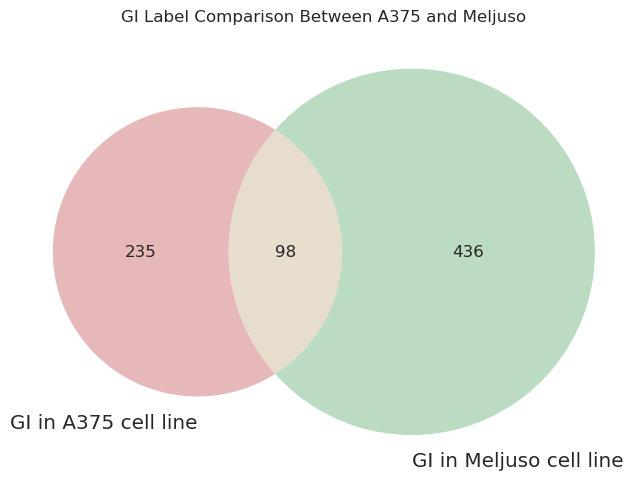

In [14]:
# Filter data to only keep rows where Class_label_sum is 'GI'
gi_data = df_sum_corr_values[df_sum_corr_values['Class_label_sum'] == 'GI']

# Group by Gene_combination and cell_line
grouped_data = gi_data.groupby(['Gene_combination', 'cell_line'])['Class_label_sum'].first().unstack()

# Identify gene combinations that are labeled as 'GI' in both A375 and Meljuso
common_gene_combinations = set(grouped_data.index[(grouped_data['A375'] == 'GI') & (grouped_data['Meljuso'] == 'GI')])

# Identify unique gene combinations for each cell line
unique_to_A375 = set(grouped_data.index[(grouped_data['A375'] == 'GI') & (grouped_data['Meljuso'].isna() | (grouped_data['Meljuso'] != 'GI'))])
unique_to_Meljuso = set(grouped_data.index[(grouped_data['Meljuso'] == 'GI') & (grouped_data['A375'].isna() | (grouped_data['A375'] != 'GI'))])

# Extract rows for common gene combinations where GI is labeled in both cell lines
df_common_gene_combinations = gi_data[gi_data['Gene_combination'].isin(common_gene_combinations)]

# Display the DataFrame for common gene combinations
print("Common Gene Combinations DataFrame:")
print(df_common_gene_combinations)

# Plot the Venn diagram to visualize the overlap
plt.figure(figsize=(8, 6))
venn2(
    subsets=(len(unique_to_A375), len(unique_to_Meljuso), len(common_gene_combinations)), 
    set_labels=('GI in A375 cell line', 'GI in Meljuso cell line')
)
plt.title("GI Label Comparison Between A375 and Meljuso")
plt.show()

# Are the group of GI in both label methods overeprecented in the gruop of overlapped GI in A375 and Meljuso cell line 
No, the gruop in commun gene label in both cell line are underreprecented copare to group that are unique for both cell line
This is means that correlation method did not used for labeling cell line indepandand GI

Count of both 'Class_label_sum' and 'Class_label_corr' as 'GI': 12
Count of 'Class_label_sum' as 'GI' but 'Class_label_corr' is not 'GI': 184


/tmp/ipykernel_7531/2784487141.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='Blues')


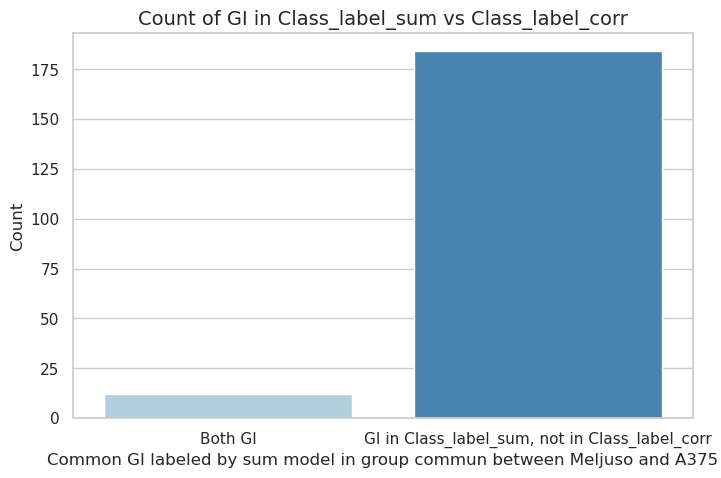

In [15]:
# 1. Count where both 'Class_label_sum' and 'Class_label_corr' are "GI"
both_GI = df_common_gene_combinations[(df_common_gene_combinations['Class_label_sum'] == 'GI') & (df_common_gene_combinations['Class_label_corr'] == 'GI')].shape[0]

# 2. Count where 'Class_label_sum' is "GI" but 'Class_label_corr' is not "GI"
GI_not_class_label_corr = df_common_gene_combinations[(df_common_gene_combinations['Class_label_sum'] == 'GI') & (df_common_gene_combinations['Class_label_corr'] != 'GI')].shape[0]

print("Count of both 'Class_label_sum' and 'Class_label_corr' as 'GI':", both_GI)
print("Count of 'Class_label_sum' as 'GI' but 'Class_label_corr' is not 'GI':", GI_not_class_label_corr)

# Prepare data for visualization
counts = {
    'Both GI': both_GI,
    'GI in Class_label_sum, not in Class_label_corr': GI_not_class_label_corr
}

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='Blues')

# Add titles and labels
plt.title('Count of GI in Class_label_sum vs Class_label_corr', fontsize=14)
plt.xlabel('Common GI labeled by sum model in group commun between Meljuso and A375', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()
#

# Make compartion between two label methods

Comparison DataFrame with Label Agreement:
     Gene_combination cell_line condition Class_label_sum  Correlation_corr  \
0          AAK1_BMP2K      A375       2CP           no GI          0.159615   
1         AARS1_AARS2      A375       2CP             lol          0.132821   
2         ABCA2_ABCA3      A375       2CP           no GI          0.326935   
3         ABCA2_ABCA7      A375       2CP           no GI          0.086174   
4         ABCA3_ABCA7      A375       2CP           no GI          0.063370   
...               ...       ...       ...             ...               ...   
8714  ZSCAN30_ZSCAN31   Meljuso   2CP sel           no GI          0.025340   
8715   ZSCAN30_ZSCAN9   Meljuso   2CP sel           no GI          0.280711   
8716   ZSCAN31_ZSCAN9   Meljuso   2CP sel           no GI          0.196111   
8717    ZSWIM4_ZSWIM6   Meljuso   2CP sel           no GI          0.281455   
8718        ZXDB_ZXDC   Meljuso   2CP sel           no GI          0.322427   

     Cla

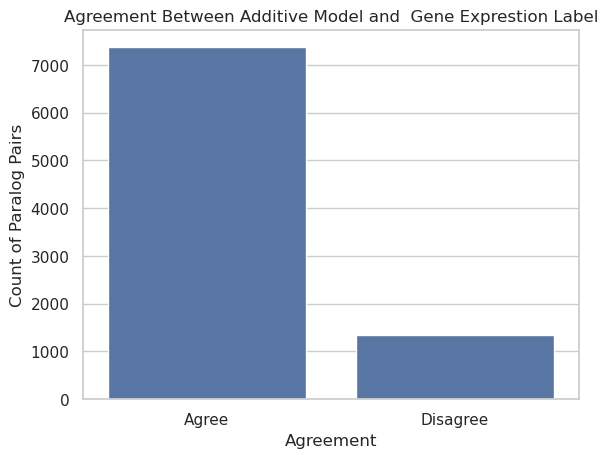

In [16]:

# Compare Interaction labels
df_sum_corr_values['Label_Agreement'] = df_sum_corr_values.apply(
    lambda x: 'Agree' if x['Class_label_corr'] == x['Class_label_sum'] else 'Disagree', axis=1
)

# Count label agreement/disagreement
agreement_summary = df_sum_corr_values['Label_Agreement'].value_counts(normalize=True) * 100

# Display comparison DataFrame and summary
print("Comparison DataFrame with Label Agreement:")
print(df_sum_corr_values)
print("\nAgreement Summary (%):")
print(agreement_summary)

# Visualization
sns.countplot(x='Label_Agreement', data=df_sum_corr_values)
plt.title('Agreement Between Additive Model and  Gene Exprestion Label')
plt.xlabel('Agreement')
plt.ylabel('Count of Paralog Pairs')
plt.show()



# Count the agreement 

In [37]:
# Count the number of agreements and disagreements per class
agreement_summary = df_sum_corr_values.groupby(['Class_label_sum', 'Class_label_corr']).size().reset_index(name='Count')
print(agreement_summary)

  Class_label_sum Class_label_corr  Count
0              GI               GI     58
1              GI            no GI    809
2             lol               GI     15
3             lol            no GI    136
4           no GI               GI    391
5           no GI            no GI   7310


# visualise the agreement in heatmap
 if you change the therothhold the procent of GI assinged as no GI, and procent of no GIasiigned as GI are same 

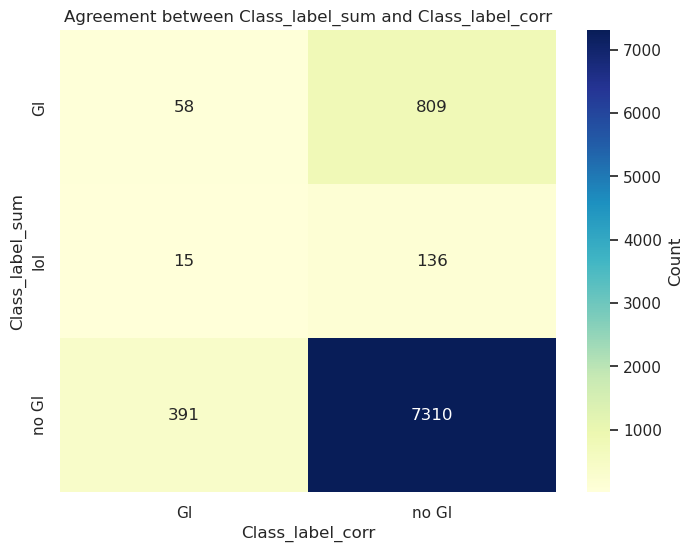

In [38]:
# Create the DataFrame
agreement_summary = pd.DataFrame(agreement_summary)

# Pivot the DataFrame for a heatmap
heatmap_data = agreement_summary.pivot(index="Class_label_sum", columns="Class_label_corr", values="Count")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title("Agreement between Class_label_sum and Class_label_corr")
plt.xlabel("Class_label_corr")
plt.ylabel("Class_label_sum")
plt.show()

# controll how the function groupy worked
this by extracting one gene opairs 

In [8]:
# Replace 'Reagent001' with the actual ReagentID you want to inspect
specific_reagent_id = 'ACTB_ACTG1_1'
if specific_reagent_id in final_expression_df['ReagentID'].values:
    specific_group = final_expression_df[final_expression_df['ReagentID'] == specific_reagent_id]
    print(specific_group)
else:
    print(f"ReagentID {specific_reagent_id} not found.")


       Cell_Line  Gene1_expression  Gene2_expression     ReagentID
0     ACH-000058         11.192051         11.328729  ACTB_ACTG1_1
1     ACH-000082         12.739343         11.145570  ACTB_ACTG1_1
2     ACH-000867         10.571643          9.839114  ACTB_ACTG1_1
3     ACH-000437         12.340807         11.277859  ACTB_ACTG1_1
4     ACH-000544         10.513251          9.981975  ACTB_ACTG1_1
...          ...               ...               ...           ...
1512  ACH-001743         10.060110          9.381893  ACTB_ACTG1_1
1513  ACH-001578         10.742062         10.965948  ACTB_ACTG1_1
1514  ACH-002669         11.523883          9.929458  ACTB_ACTG1_1
1515  ACH-001858         12.929043         12.061918  ACTB_ACTG1_1
1516  ACH-001997         11.275233         10.940359  ACTB_ACTG1_1

[1517 rows x 4 columns]
